In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load the Dataset
data = pd.read_csv("/content/bank-additional-full.csv", sep=';')
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [ ]:
# Display basic information about the dataset
# Step 2: Corpus Exploration
print("Dataset Information:")
data.info()
data.shape

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.

(41188, 21)

In [ ]:
# Display class distribution
y_distribution = data['y'].value_counts()
print("Class Distribution:")
print(y_distribution)

Class Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


<ipython-input-11-81743cdaaaf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_distribution.index, y=y_distribution.values, palette="viridis")


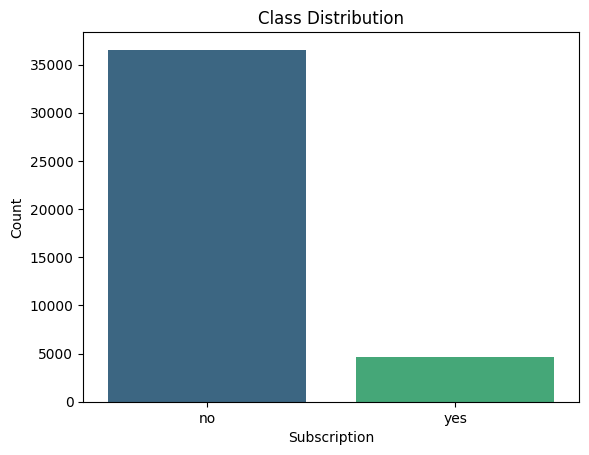

In [ ]:
# Visualize class distribution
sns.barplot(x=y_distribution.index, y=y_distribution.values, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Subscription")
plt.ylabel("Count")
plt.show()

In [ ]:
# Display basic statistics for numerical features
print("Statistical Summary of Numerical Features:")
print(data.describe())

Statistical Summary of Numerical Features:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        

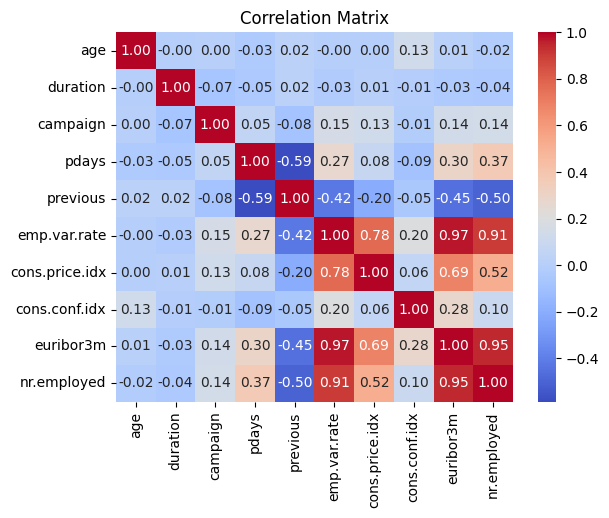

In [ ]:
# Visualize correlations among numerical features
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Step 3: Data Preprocessing
# Encoding categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Separate Features (X) and Target (y)
X = data.drop(columns=['y'])
y = LabelEncoder().fit_transform(data['y'])

In [ ]:
# Standardizing Numerical Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Preprocessing Completed")

Data Preprocessing Completed


In [ ]:
# Step 4:Building the Neural Network Model
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network
print("Training Neural Network...")
history = model_nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save the Neural Network Model
print("Saving Neural Network Model...")
model_nn.save("neural_network_model.keras")
print("Neural Network Model Saved Successfully")


Building Neural Network Model...
Training Neural Network...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8826 - loss: 0.2963 - val_accuracy: 0.9125 - val_loss: 0.1944
Epoch 2/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9110 - loss: 0.1968 - val_accuracy: 0.9144 - val_loss: 0.1906
Epoch 3/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9114 - loss: 0.1919 - val_accuracy: 0.9134 - val_loss: 0.1892
Epoch 4/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9107 - loss: 0.1914 - val_accuracy: 0.9143 - val_loss: 0.1863
Epoch 5/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9137 - loss: 0.1834 - val_accuracy: 0.9154 - val_loss: 0.1846
Epoch 6/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9157 - loss: 0.1812 - val_accuracy: 0.9165 - val_loss: 0.1832
Epoch 7/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9137 - loss: 0.1815 - val_accuracy: 0.9178 - val_loss: 0.1817
Epoch 8/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9150 - loss: 0.1783 - 

In [ ]:
# Step 5: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #number of decision trees = 100

# Train the Random Forest Model
print("Training Random Forest...")
rf_model.fit(X_train, y_train)

# Save the Random Forest Model
print("Saving Random Forest Model...")
joblib.dump(rf_model, "random_forest_model.pkl")
print("Random Forest Model Saved Successfully")


Building Random Forest Model...
Training Random Forest...
Saving Random Forest Model...
Random Forest Model Saved Successfully


Evaluating Models...
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network Metrics:
{'F1-Score': 0.6034968979131415, 'Precision': 0.6384248210023866, 'Recall': 0.5721925133689839}
Random Forest Metrics:
{'F1-Score': 0.5719402985074626, 'Precision': 0.6472972972972973, 'Recall': 0.5122994652406417}
Confusion Matrices:


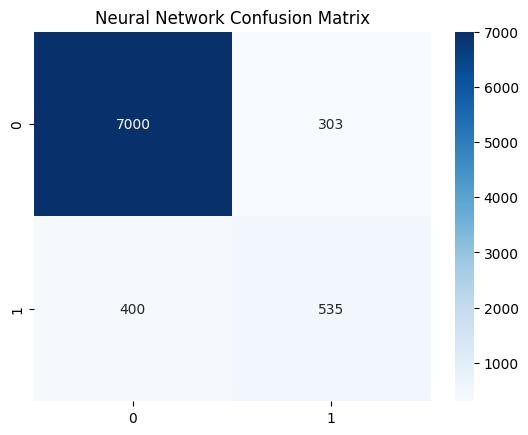

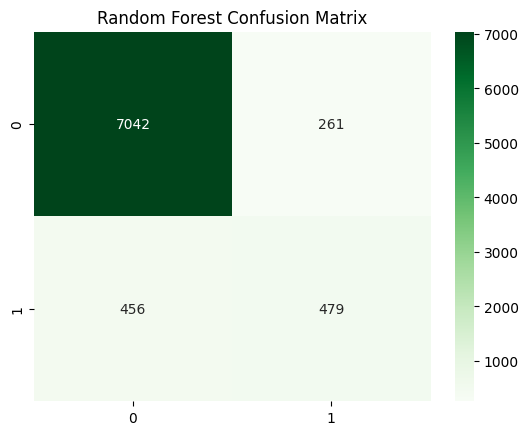

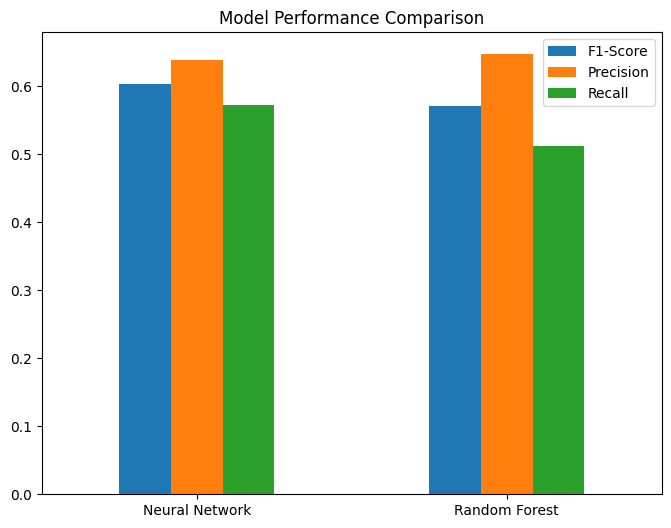

In [ ]:
# Step 6: Model Evaluation
# Neural Network Predictions
nn_predictions = (model_nn.predict(X_test) > 0.5).astype("int32")

# Random Forest Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate Neural Network
nn_metrics = {
    "F1-Score": f1_score(y_test, nn_predictions),
    "Precision": precision_score(y_test, nn_predictions),
    "Recall": recall_score(y_test, nn_predictions)
}
print("Neural Network Metrics:")
print(nn_metrics)

# Evaluate Random Forest
rf_metrics = {
    "F1-Score": f1_score(y_test, rf_predictions),
    "Precision": precision_score(y_test, rf_predictions),
    "Recall": recall_score(y_test, rf_predictions)
}
print("Random Forest Metrics:")
print(rf_metrics)

# Confusion Matrices
print("Confusion Matrices:")
sns.heatmap(confusion_matrix(y_test, nn_predictions), annot=True, fmt="d", cmap="Blues")
plt.title("Neural Network Confusion Matrix")
plt.show()

sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Visualize Model Performance
metrics_df = pd.DataFrame([nn_metrics, rf_metrics], index=['Neural Network', 'Random Forest'])
metrics_df.plot(kind='bar', figsize=(8, 6), title="Model Performance Comparison")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Step 7: Experimental Insights and Testing Interface
print("--- User-Friendly Testing Interface ---")

while True:
    print("\nOptions:")
    print("1. Test with a specific sample from the test dataset")
    print("2. Test with random samples")
    print("3. Exit")

    choice = input("Enter your choice (1/2/3): ")

    if choice == '1':
        sample_index = int(input("Enter a sample index (0 to {}): ".format(len(X_test) - 1)))
        if 0 <= sample_index < len(X_test):
            sample_data = X_test[sample_index].reshape(1, -1)

            # Neural Network Prediction
            nn_sample_prediction = (model_nn.predict(sample_data) > 0.5).astype("int32")
            print("Neural Network Prediction:", "Yes" if nn_sample_prediction[0][0] == 1 else "No")

            # Random Forest Prediction
            rf_sample_prediction = rf_model.predict(sample_data)
            print("Random Forest Prediction:", "Yes" if rf_sample_prediction[0] == 1 else "No")

            # Actual value (True label) from y_test
            actual_value = y_test[sample_index]
            print("Actual Value:", "Yes" if actual_value == 1 else "No")

        else:
            print("Invalid sample index.")

    elif choice == '2':
        num_samples = int(input("Enter number of random samples to test (max 10): "))
        if 1 <= num_samples <= 10:
            random_indices = np.random.choice(len(X_test), num_samples, replace=False)
            sample_data = X_test[random_indices]

            # Neural Network Predictions
            nn_sample_predictions = (model_nn.predict(sample_data) > 0.5).astype("int32")
            print("Neural Network Predictions:", ["Yes" if p == 1 else "No" for p in nn_sample_predictions.flatten()])

            # Random Forest Predictions
            rf_sample_predictions = rf_model.predict(sample_data)
            print("Random Forest Predictions:", ["Yes" if p == 1 else "No" for p in rf_sample_predictions])

            # Actual Values from y_test
            actual_values = y_test[random_indices]
            print("Actual Values:", ["Yes" if a == 1 else "No" for a in actual_values])

        else:
            print("Enter a valid number of samples (1 to 10).")

    elif choice == '3':
        print("Exiting the testing interface.")
        break

    else:
        print("Invalid choice. Please enter 1, 2, or 3.")

print("All Tasks Completed Successfully!")


--- User-Friendly Testing Interface ---

Options:
1. Test with a specific sample from the test dataset
2. Test with random samples
3. Exit
Enter your choice (1/2/3): 1
Enter a sample index (0 to 8237): 1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Neural Network Prediction: No
Random Forest Prediction: No
Actual Value: No

Options:
1. Test with a specific sample from the test dataset
2. Test with random samples
3. Exit
Enter your choice (1/2/3): 2
Enter number of random samples to test (max 10): 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Neural Network Predictions: ['No', 'No', 'No', 'No', 'No']
Random Forest Predictions: ['No', 'No', 'No', 'No', 'No']
Actual Values: ['No', 'No', 'No', 'No', 'No']

Options:
1. Test with a specific sample from the test dataset
2. Test with random samples
3. Exit
Enter your choice (1/2/3): 2
Enter number of random samples to test (max 10): 100
Enter a valid number of samples (1 to 10).

Options:
1. Test with a specific sample from the test dataset
2. Test with